<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.262363,21.109602,41.906081,-0.032242,149.245804,149.233031,0.012773
1,0.0,1.0,76.169979,81.831931,57.664375,-0.031014,225.635271,225.642066,-0.006795
2,0.0,2.0,74.498518,73.749340,79.235296,-0.013409,237.469745,237.462172,0.007573
3,0.0,3.0,56.669290,97.192652,74.737716,-0.044493,238.555165,238.607507,-0.052342
4,0.0,4.0,40.085820,27.616116,67.554366,0.065903,145.322205,145.263236,0.058969
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,66.363906,54.061491,42.164706,0.021518,172.611621,172.601928,0.009693
19996,999.0,16.0,58.671809,69.895646,57.917177,0.018542,196.503175,196.483549,0.019626
19997,999.0,17.0,32.526454,29.315356,36.822008,-0.026370,108.637448,108.671502,-0.034054
19998,999.0,18.0,60.329644,83.654796,74.167651,-0.034584,228.117506,228.145926,-0.028420


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.262363,21.109602,41.906081,-0.032242,149.245804,149.233031,0.012773
1,0.0,1.0,76.169979,81.831931,57.664375,-0.031014,225.635271,225.642066,-0.006795
2,0.0,2.0,74.498518,73.749340,79.235296,-0.013409,237.469745,237.462172,0.007573
3,0.0,3.0,56.669290,97.192652,74.737716,-0.044493,238.555165,238.607507,-0.052342
4,0.0,4.0,40.085820,27.616116,67.554366,0.065903,145.322205,145.263236,0.058969
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,66.363906,54.061491,42.164706,0.021518,172.611621,172.601928,0.009693
19996,999.0,16.0,58.671809,69.895646,57.917177,0.018542,196.503175,196.483549,0.019626
19997,999.0,17.0,32.526454,29.315356,36.822008,-0.026370,108.637448,108.671502,-0.034054
19998,999.0,18.0,60.329644,83.654796,74.167651,-0.034584,228.117506,228.145926,-0.028420


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.262363  21.109602  41.906081  ...  149.245804  149.233031  0.012773
      1.0    76.169979  81.831931  57.664375  ...  225.635271  225.642066 -0.006795
      2.0    74.498518  73.749340  79.235296  ...  237.469745  237.462172  0.007573
      3.0    56.669290  97.192652  74.737716  ...  238.555165  238.607507 -0.052342
      4.0    40.085820  27.616116  67.554366  ...  145.322205  145.263236  0.058969
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   66.363906  54.061491  42.164706  ...  172.611621  172.601928  0.009693
      16.0   58.671809  69.895646  57.917177  ...  196.503175  196.483549  0.019626
      17.0   32.526454  29.315356  36.822008  ...  108.637448  108.671502 -0.034054
      18.0   60.329644  83.654796  74.167651  ...  228.117506  228.145926 -0.028420
      19.0   80.925530  47.375464  75.212545  ...  213.549649  213.549365  0.000284

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.262363  21.109602  41.906081  ...  149.245804  149.233031  0.012773
      1.0    76.169979  81.831931  57.664375  ...  225.635271  225.642066 -0.006795
      2.0    74.498518  73.749340  79.235296  ...  237.469745  237.462172  0.007573
      3.0    56.669290  97.192652  74.737716  ...  238.555165  238.607507 -0.052342
      4.0    40.085820  27.616116  67.554366  ...  145.322205  145.263236  0.058969
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   66.363906  54.061491  42.164706  ...  172.611621  172.601928  0.009693
      16.0   58.671809  69.895646  57.917177  ...  196.503175  196.483549  0.019626
      17.0   32.526454  29.315356  36.822008  ...  108.637448  108.671502 -0.034054
      18.0   60.329644  83.654796  74.167651  ...  228.117506  228.145926 -0.028420
      19.0   80.925530  47.375464  75.212545  ...  213.549649  213.549365  0.000284

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.262363,21.109602,41.906081,-0.032242,149.245804,149.233031,0.012773
1,0.0,1.0,76.169979,81.831931,57.664375,-0.031014,225.635271,225.642066,-0.006795
2,0.0,2.0,74.498518,73.749340,79.235296,-0.013409,237.469745,237.462172,0.007573
3,0.0,3.0,56.669290,97.192652,74.737716,-0.044493,238.555165,238.607507,-0.052342
4,0.0,4.0,40.085820,27.616116,67.554366,0.065903,145.322205,145.263236,0.058969
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,66.363906,54.061491,42.164706,0.021518,172.611621,172.601928,0.009693
19996,999.0,16.0,58.671809,69.895646,57.917177,0.018542,196.503175,196.483549,0.019626
19997,999.0,17.0,32.526454,29.315356,36.822008,-0.026370,108.637448,108.671502,-0.034054
19998,999.0,18.0,60.329644,83.654796,74.167651,-0.034584,228.117506,228.145926,-0.028420


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.262363  21.109602  41.906081  ...  149.245804  149.233031  0.012773
      1.0    76.169979  81.831931  57.664375  ...  225.635271  225.642066 -0.006795
      2.0    74.498518  73.749340  79.235296  ...  237.469745  237.462172  0.007573
      3.0    56.669290  97.192652  74.737716  ...  238.555165  238.607507 -0.052342
      4.0    40.085820  27.616116  67.554366  ...  145.322205  145.263236  0.058969
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   66.363906  54.061491  42.164706  ...  172.611621  172.601928  0.009693
      16.0   58.671809  69.895646  57.917177  ...  196.503175  196.483549  0.019626
      17.0   32.526454  29.315356  36.822008  ...  108.637448  108.671502 -0.034054
      18.0   60.329644  83.654796  74.167651  ...  228.117506  228.145926 -0.028420
      19.0   80.925530  47.375464  75.212545  ...  213.549649  213.549365  0.000284

[20000 rows x 7 columns]

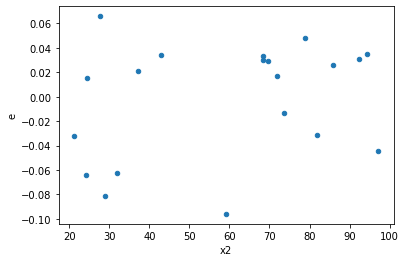

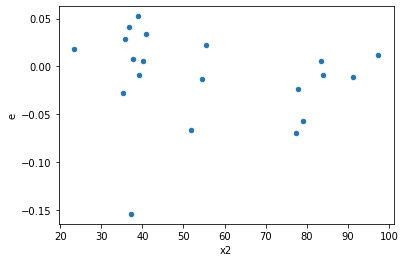

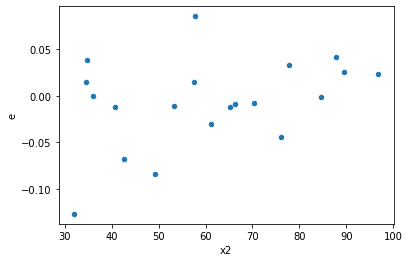

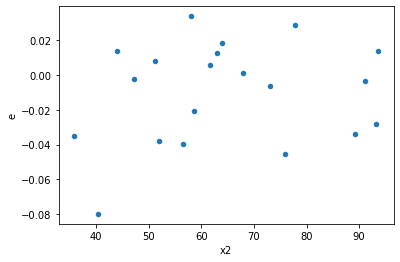

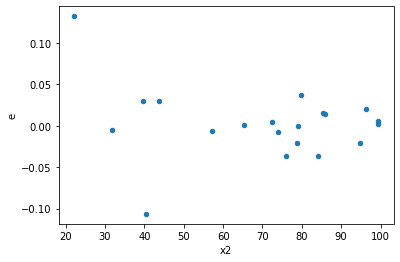

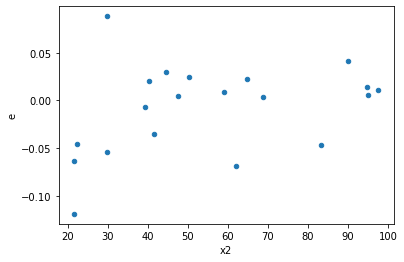

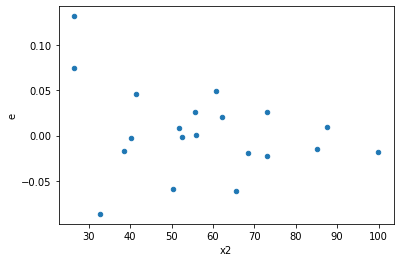

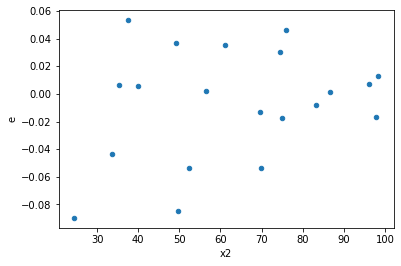

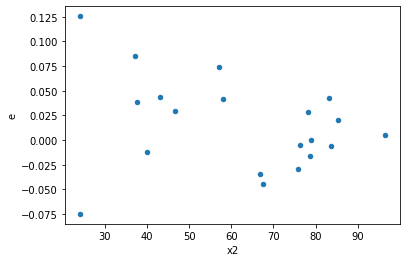

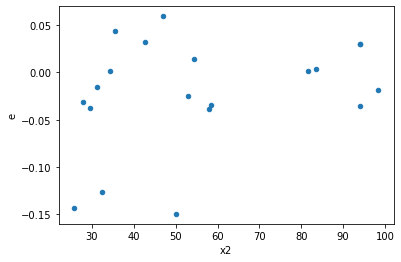

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,5.0,5.0,0.005082757784019302,0.005841460409930528,0.0010165515568038605,0.0011682920819861054,1.1492698763448184,0.8823797328597864,0.5588101335701068,0.4411898664298932,Reject001=1 : Homoscedasticity
12.0,5.0,5.0,0.005224545062077525,0.00913294346065457,0.001044909012415505,0.0018265886921309139,1.7480839675297741,0.5547955885546072,0.7226022057226964,0.2773977942773036,Reject001=1 : Homoscedasticity
32.0,5.0,5.0,0.0009434959168642216,0.0046438535543650815,0.00018869918337284432,0.0009287707108730163,4.921964654387983,0.10505164690718183,0.9474741765464091,0.052525823453590914,Reject001=1 : Homoscedasticity
38.0,5.0,5.0,0.0015500598521535573,0.0035252048207039654,0.00031001197043071144,0.0007050409641407931,2.274237872690054,0.3881960688222732,0.8059019655888634,0.1940980344111366,Reject001=1 : Homoscedasticity
50.0,5.0,5.0,0.0006636494394976101,0.005014332912011577,0.00013272988789952202,0.0010028665824023154,7.555695241462845,0.044536750752878884,0.9777316246235606,0.022268375376439442,Reject001=1 : Homoscedasticity
55.0,5.0,5.0,0.0014098575874336103,0.0019050833623027808,0.00028197151748672204,0.0003810166724605562,1.3512594316498585,0.7492048007527146,0.6253975996236427,0.3746024003763573,Reject001=1 : Homoscedasticity
56.0,5.0,5.0,0.007390054220359005,0.008112213260025656,0.001478010844071801,0.001622442652005131,1.0977203980015682,0.9210021716823484,0.5394989141588258,0.4605010858411742,Reject001=1 : Homoscedasticity
63.0,5.0,5.0,0.004984877504173438,0.0058571934418057536,0.0009969755008346875,0.0011714386883611508,1.1749924520516293,0.8638543224426263,0.5680728387786869,0.43192716122131314,Reject001=1 : Homoscedasticity
80.0,5.0,5.0,0.00198457719575831,0.004228766001120405,0.00039691543915166205,0.000845753200224081,2.130814568543194,0.4260282602520731,0.7869858698739635,0.21301413012603654,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.01313994498492491,0.003668295396988597,0.002627988996984982,0.0007336590793977194,0.27917129038189503,0.18770424073350928,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.026460261687371704,0.006808872272778623,0.00529205233747434,0.0013617744545557247,0.2573244495169975,0.16258471244714393,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.016682280437510664,0.002481929584601438,0.003336456087502133,0.0004963859169202875,0.14877639744148743,0.05671403942426598,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.007667763339134358,0.0008866612448889236,0.0015335526678268716,0.00017733224897778472,0.11563492581514938,0.033491149599908426,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,0.025593740643529306,0.003149992160531315,0.005118748128705861,0.000629998432106263,0.12307666176681784,0.03823391714448555,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,0.005082757784019302,0.005841460409930528,0.0010165515568038605,0.0011682920819861054,1.1492698763448184,0.8823797328597864,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.021845922193022727,0.001776578979390653,0.004369184438604545,0.0003553157958781306,0.0813231395632301,0.015515005639238797,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,0.009860457130115732,0.0009894724347468138,0.0019720914260231465,0.00019789448694936275,0.10034752158951887,0.024669517326748443,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,0.0205547375532285,0.002354160859987582,0.0041109475106457,0.0004708321719975164,0.11453130227964489,0.03281230525211051,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      879
Reject001=0 : Heteroscedasticity    121
Name: Result_test, dtype: int64